# CareerERA Invenstment VC Capstone Project

In [1]:
from dataclasses import dataclass
import datetime
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
from plotly.subplots import make_subplots

from sklearn.metrics import (
    accuracy_score, auc, classification_report, f1_score, make_scorer,
    mean_squared_error, precision_score, recall_score, roc_curve)

warnings.filterwarnings('ignore')

## Import data file

The file kept returning unicode errors, so needed speacial handling while loading.

In [2]:
df = pd.read_csv('data/investments_VC.csv', engine='python', encoding='unicode_escape')
df.head()

permalink                name  \
0            /organization/waywire            #waywire   
1  /organization/tv-communications  &TV Communications   
2    /organization/rock-your-paper   'Rock' Your Paper   
3   /organization/in-touch-network   (In)Touch Network   
4   /organization/r-ranch-and-mine  -R- Ranch and Mine   

                    homepage_url  \
0         http://www.waywire.com   
1          http://enjoyandtv.com   
2   http://www.rockyourpaper.org   
3  http://www.InTouchNetwork.com   
4                            NaN   

                                       category_list        market   \
0         |Entertainment|Politics|Social Media|News|          News    
1                                            |Games|         Games    
2                             |Publishing|Education|    Publishing    
3  |Electronics|Guides|Coffee|Restaurants|Music|i...   Electronics    
4                      |Tourism|Entertainment|Games|       Tourism    

   funding_total_usd      status country_code state_code         region  ...  \
0          17,50,000    acquired          USA         NY  New York City  ...   
1          40,00,000   operating          USA         CA    Los Angeles  ...   
2             40,000   operating          EST        NaN        Tallinn  ...   
3          15,00,000   operating          GBR        NaN         London  ...   
4             60,000   operating          USA         TX         Dallas  ...   

  secondary_market  product_crowdfunding round_A round_B round_C  round_D  \
0              0.0                   0.0     0.0     0.0     0.0      0.0   
1              0.0                   0.0     0.0     0.0     0.0      0.0   
2              0.0                   0.0     0.0     0.0     0.0      0.0   
3              0.0                   0.0     0.0     0.0     0.0      0.0   
4              0.0                   0.0     0.0     0.0     0.0      0.0   

  round_E round_F  round_G  round_H  
0     0.0     0.0      0.0      0.0  
1     0.0     0.0      0.0      0.0  
2     0.0     0.0      0.0      0.0  
3     0.0     0.0      0.0      0.0  
4     0.0     0.0      0.0      0.0  

[5 rows x 39 columns]

## Exploratory Data Analysis

Let's explore the data further and see what we are dealing with.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54294 entries, 0 to 54293
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   permalink             49438 non-null  object 
 1   name                  49437 non-null  object 
 2   homepage_url          45989 non-null  object 
 3   category_list         45477 non-null  object 
 4    market               45470 non-null  object 
 5    funding_total_usd    49438 non-null  object 
 6   status                48124 non-null  object 
 7   country_code          44165 non-null  object 
 8   state_code            30161 non-null  object 
 9   region                44165 non-null  object 
 10  city                  43322 non-null  object 
 11  funding_rounds        49438 non-null  float64
 12  founded_at            38554 non-null  object 
 13  founded_month         38482 non-null  object 
 14  founded_quarter       38482 non-null  object 
 15  founded_year       

In [4]:
df.shape

(54294, 39)

As can be seen here, the dataset consists of 54,294 rows and 39 columns.

There's a lot of data here, let's see if there are any duplicate entries.

In [5]:
# check for duplicate rows
print(df.duplicated().sum())

4855


Wow, there were quite a bit of duplicate rows!

In [6]:
df.drop_duplicates(inplace=True)
df.shape

(49439, 39)

### Let's take a look at the column names

In [7]:
df.columns

Index(['permalink', 'name', 'homepage_url', 'category_list', ' market ',
       ' funding_total_usd ', 'status', 'country_code', 'state_code', 'region',
       'city', 'funding_rounds', 'founded_at', 'founded_month',
       'founded_quarter', 'founded_year', 'first_funding_at',
       'last_funding_at', 'seed', 'venture', 'equity_crowdfunding',
       'undisclosed', 'convertible_note', 'debt_financing', 'angel', 'grant',
       'private_equity', 'post_ipo_equity', 'post_ipo_debt',
       'secondary_market', 'product_crowdfunding', 'round_A', 'round_B',
       'round_C', 'round_D', 'round_E', 'round_F', 'round_G', 'round_H'],
      dtype='object')

There appears to be empty spaces in some of the column names, let's clean those up.

In [8]:
df.columns = [column.strip() for column in df.columns]
df.columns

Index(['permalink', 'name', 'homepage_url', 'category_list', 'market',
       'funding_total_usd', 'status', 'country_code', 'state_code', 'region',
       'city', 'funding_rounds', 'founded_at', 'founded_month',
       'founded_quarter', 'founded_year', 'first_funding_at',
       'last_funding_at', 'seed', 'venture', 'equity_crowdfunding',
       'undisclosed', 'convertible_note', 'debt_financing', 'angel', 'grant',
       'private_equity', 'post_ipo_equity', 'post_ipo_debt',
       'secondary_market', 'product_crowdfunding', 'round_A', 'round_B',
       'round_C', 'round_D', 'round_E', 'round_F', 'round_G', 'round_H'],
      dtype='object')

Now let's take a look at the null values.

In [9]:
df.isnull().sum()

permalink                   1
name                        2
homepage_url             3450
category_list            3962
market                   3969
funding_total_usd           1
status                   1315
country_code             5274
state_code              19278
region                   5274
city                     6117
funding_rounds              1
founded_at              10885
founded_month           10957
founded_quarter         10957
founded_year            10957
first_funding_at            1
last_funding_at             1
seed                        1
venture                     1
equity_crowdfunding         1
undisclosed                 1
convertible_note            1
debt_financing              1
angel                       1
grant                       1
private_equity              1
post_ipo_equity             1
post_ipo_debt               1
secondary_market            1
product_crowdfunding        1
round_A                     1
round_B                     1
round_C   

Let's take a look at the two rows with no names.

In [10]:
df.loc[df['name'].isnull()]

permalink name           homepage_url category_list  \
28221  /organization/tell-it-in  NaN  http://tellitin10.com    |Startups|   
49438                       NaN  NaN                    NaN           NaN   

           market funding_total_usd  status country_code state_code region  \
28221   Startups            25,000   closed          NaN        NaN    NaN   
49438         NaN               NaN     NaN          NaN        NaN    NaN   

       ... secondary_market  product_crowdfunding round_A round_B round_C  \
28221  ...              0.0                   0.0     0.0     0.0     0.0   
49438  ...              NaN                   NaN     NaN     NaN     NaN   

       round_D round_E round_F  round_G  round_H  
28221      0.0     0.0     0.0      0.0      0.0  
49438      NaN     NaN     NaN      NaN      NaN  

[2 rows x 39 columns]

Let's add a name to the first one and remove the whole record for the second.

In [11]:
df['name'].fillna(df.iloc[28221].homepage_url.split('.')[0].replace('http://', '').title(), inplace=True)
df.dropna(subset=['permalink'], inplace=True)

Let's take a look at the first row, to get a better sense of what each feature represents.

In [12]:
df.iloc[0]

permalink                                    /organization/waywire
name                                                      #waywire
homepage_url                                http://www.waywire.com
category_list           |Entertainment|Politics|Social Media|News|
market                                                       News 
funding_total_usd                                       17,50,000 
status                                                    acquired
country_code                                                   USA
state_code                                                      NY
region                                               New York City
city                                                      New York
funding_rounds                                                 1.0
founded_at                                              2012-06-01
founded_month                                              2012-06
founded_quarter                                            201

First thing that I notice is the placement of those commas in the dollar amount in funding_total_usd. Let's clean that up.

In [13]:
df['funding_total_usd'] = df['funding_total_usd'].apply(lambda x: x.strip().replace(',', '') if isinstance(x, str) else x)

In [14]:
df.iloc[0]

permalink                                    /organization/waywire
name                                                      #waywire
homepage_url                                http://www.waywire.com
category_list           |Entertainment|Politics|Social Media|News|
market                                                       News 
funding_total_usd                                          1750000
status                                                    acquired
country_code                                                   USA
state_code                                                      NY
region                                               New York City
city                                                      New York
funding_rounds                                                 1.0
founded_at                                              2012-06-01
founded_month                                              2012-06
founded_quarter                                            201

Out of all of the columns that are objects, let's see which might be better off as being considered categories.

In [15]:
for column in df.columns:
    if df[column].dtype == 'object':
        print(f'{column}: {len(df[column].unique())}')

permalink: 49436
name: 49351
homepage_url: 45851
category_list: 16676
market: 754
funding_total_usd: 14617
status: 4
country_code: 116
state_code: 62
region: 1090
city: 4189
founded_at: 3370
founded_month: 421
founded_quarter: 219
first_funding_at: 3914
last_funding_at: 3657


Let's take a closer look at `status`.

In [16]:
df.status.unique()

array(['acquired', 'operating', nan, 'closed'], dtype=object)

Let's change those `NaN` into `pending` so that we don't have any null values.

In [17]:
df['status'].fillna('pending', inplace=True)

It appears that `market`, `status`, `country_code`, `state_code`, `founded_month`, and `founded_quarter` would be better handled as categorical objects.

In [18]:
df[['market', 'status', 'country_code', 'state_code', 'founded_month', 'founded_quarter']] = df[['market', 'status', 'country_code', 'state_code', 'founded_month', 'founded_quarter']].astype('category')

In [19]:
df.founded_month.sample(5)

12315    2013-09
31985    2013-08
25356    2004-01
11864        NaN
25715    2013-09
Name: founded_month, dtype: category
Categories (420, object): ['1902-01', '1903-01', '1905-01', '1906-01', ..., '2014-09', '2014-10', '2014-11', '2014-12']

In [20]:
df.founded_quarter.sample(5)

33363    2006-Q1
8768     2014-Q3
47255    2011-Q4
10847        NaN
45561        NaN
Name: founded_quarter, dtype: category
Categories (218, object): ['1902-Q1', '1903-Q1', '1905-Q1', '1906-Q1', ..., '2014-Q1', '2014-Q2', '2014-Q3', '2014-Q4']

Let's see which of these need to be converted to dates.

In [21]:
df.founded_at.sample(5)

23524    2006-01-01
8403     2011-01-01
41202    2010-09-01
31096    2002-01-01
47196           NaN
Name: founded_at, dtype: object

In [22]:
df.first_funding_at.sample(5)

2651     2009-10-01
30138    2010-06-18
25692    2012-12-01
13521    2009-10-27
45056    2014-01-02
Name: first_funding_at, dtype: object

In [23]:
df.last_funding_at.sample(5)

24393    2010-10-08
13549    2010-10-21
32140    2012-04-01
4388     2011-07-29
37644    2014-04-23
Name: last_funding_at, dtype: object

In [24]:
dt_objects = ['founded_month', 'founded_at', 'first_funding_at', 'last_funding_at']
for d in dt_objects:
    df[d] = pd.to_datetime(df[d], errors='coerce')

In [25]:
df.founded_month.sample()

48527   NaT
Name: founded_month, dtype: category
Categories (420, datetime64[ns]): [1902-01-01, 1903-01-01, 1905-01-01, 1906-01-01, ..., 2014-09-01, 2014-10-01, 2014-11-01, 2014-12-01]

In [26]:
df.isnull().sum()

permalink                   0
name                        0
homepage_url             3449
category_list            3961
market                   3968
funding_total_usd           0
status                      0
country_code             5273
state_code              19277
region                   5273
city                     6116
funding_rounds              0
founded_at              10885
founded_month           10956
founded_quarter         10956
founded_year            10956
first_funding_at           10
last_funding_at             6
seed                        0
venture                     0
equity_crowdfunding         0
undisclosed                 0
convertible_note            0
debt_financing              0
angel                       0
grant                       0
private_equity              0
post_ipo_equity             0
post_ipo_debt               0
secondary_market            0
product_crowdfunding        0
round_A                     0
round_B                     0
round_C   

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49438 entries, 0 to 49437
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   permalink             49438 non-null  object        
 1   name                  49438 non-null  object        
 2   homepage_url          45989 non-null  object        
 3   category_list         45477 non-null  object        
 4   market                45470 non-null  category      
 5   funding_total_usd     49438 non-null  object        
 6   status                49438 non-null  category      
 7   country_code          44165 non-null  category      
 8   state_code            30161 non-null  category      
 9   region                44165 non-null  object        
 10  city                  43322 non-null  object        
 11  funding_rounds        49438 non-null  float64       
 12  founded_at            38553 non-null  datetime64[ns]
 13  founded_month   

In [28]:
df['funding_total_usd'] = df['funding_total_usd'].apply(lambda x: 0.0 if x == '-' else float(x))

In [29]:
# Find the average funding total for all companies
avg_funding = df['funding_total_usd'].mean()
print(f"The average funding total for all companies is: ${avg_funding:,.2f}")

The average funding total for all companies is: $13,166,667.40


In [30]:
# Find the number of companies in each funding round
round_counts = df[['seed', 'venture', 'equity_crowdfunding', 'undisclosed', 'convertible_note', 'debt_financing', 'angel', 'grant','private_equity', 'post_ipo_equity', 'post_ipo_debt','secondary_market', 'product_crowdfunding', 'round_A', 'round_B','round_C', 'round_D', 'round_E', 'round_F', 'round_G', 'round_H']].sum()
print("Number of companies in each funding round:")
print(round_counts)

Number of companies in each funding round:
seed                    1.074394e+10
venture                 3.708369e+11
equity_crowdfunding     3.047023e+08
undisclosed             6.437880e+09
convertible_note        1.155074e+09
debt_financing          9.334670e+10
angel                   3.234184e+09
grant                   8.050745e+09
private_equity          1.025485e+11
post_ipo_equity         3.010150e+10
post_ipo_debt           2.192259e+10
secondary_market        1.901184e+09
product_crowdfunding    3.497356e+08
round_A                 6.149865e+10
round_B                 7.380555e+10
round_C                 5.959038e+10
round_D                 3.646181e+10
round_E                 1.693094e+10
round_F                 8.393049e+09
round_G                 2.851122e+09
round_H                 7.036000e+08
dtype: float64


In [31]:
# Find the number of companies founded in each year
year_counts = df['founded_year'].value_counts()
print("Number of companies founded in each year:")
print(year_counts)

Number of companies founded in each year:
2012.0    5211
2011.0    4905
2013.0    4044
2010.0    3773
2009.0    2979
          ... 
1943.0       1
1946.0       1
1918.0       1
1944.0       1
1907.0       1
Name: founded_year, Length: 103, dtype: int64


In [32]:
# describe the dataset
print(df.describe())

       funding_total_usd  funding_rounds  founded_year          seed  \
count       4.943800e+04    49438.000000  38482.000000  4.943800e+04   
mean        1.316667e+07        1.696205   2007.359129  2.173215e+05   
std         1.535540e+08        1.294213      7.579203  1.056985e+06   
min         0.000000e+00        1.000000   1902.000000  0.000000e+00   
25%         5.000000e+04        1.000000   2006.000000  0.000000e+00   
50%         1.000000e+06        1.000000   2010.000000  0.000000e+00   
75%         6.772162e+06        2.000000   2012.000000  2.500000e+04   
max         3.007950e+10       18.000000   2014.000000  1.300000e+08   

            venture  equity_crowdfunding   undisclosed  convertible_note  \
count  4.943800e+04         4.943800e+04  4.943800e+04      4.943800e+04   
mean   7.501051e+06         6.163322e+03  1.302213e+05      2.336410e+04   
std    2.847112e+07         1.999048e+05  2.981404e+06      1.432046e+06   
min    0.000000e+00         0.000000e+00  0.000

In [33]:
# check the distribution of values in the 'status' column
print(df['status'].value_counts())

operating    41829
acquired      3692
closed        2603
pending       1314
Name: status, dtype: int64


In [34]:
# check the correlation between funding rounds and funding total
print(df[['funding_rounds','funding_total_usd']].corr())

                   funding_rounds  funding_total_usd
funding_rounds           1.000000           0.110458
funding_total_usd        0.110458           1.000000


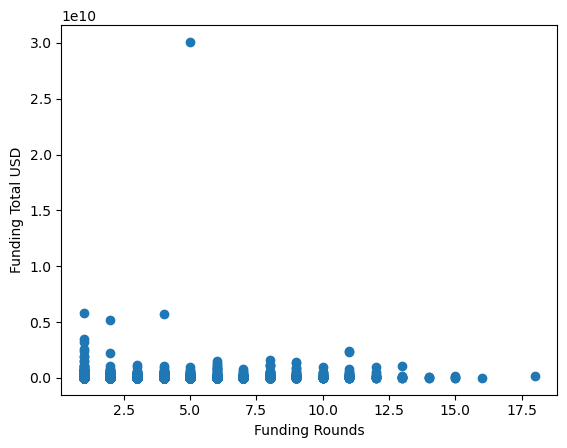

In [35]:
# visualize the relationship between funding rounds and funding total
import matplotlib.pyplot as plt
plt.scatter(df['funding_rounds'], df['funding_total_usd'])
plt.xlabel('Funding Rounds')
plt.ylabel('Funding Total USD')
plt.show()

## Top market categories

In [36]:
market_counts = df['market'].value_counts()
print("Number of companies in each market:")
print(market_counts)

Number of companies in each market:
 Software                          4620
 Biotechnology                     3688
 Mobile                            1983
 E-Commerce                        1805
 Curated Web                       1655
                                   ... 
 Rural Energy                         1
 Debt Collecting                      1
 Retirement                           1
 Resorts                              1
 Radical Breakthrough Startups        1
Name: market, Length: 753, dtype: int64


There's way too many to look at, let's look at the top 20.

In [37]:
top_20_markets_df = pd.DataFrame(market_counts[:20]).reset_index()
top_20_markets_df.columns = ['market', 'counts']
top_20_markets_df.head()

market  counts
0        Software     4620
1   Biotechnology     3688
2          Mobile     1983
3      E-Commerce     1805
4     Curated Web     1655

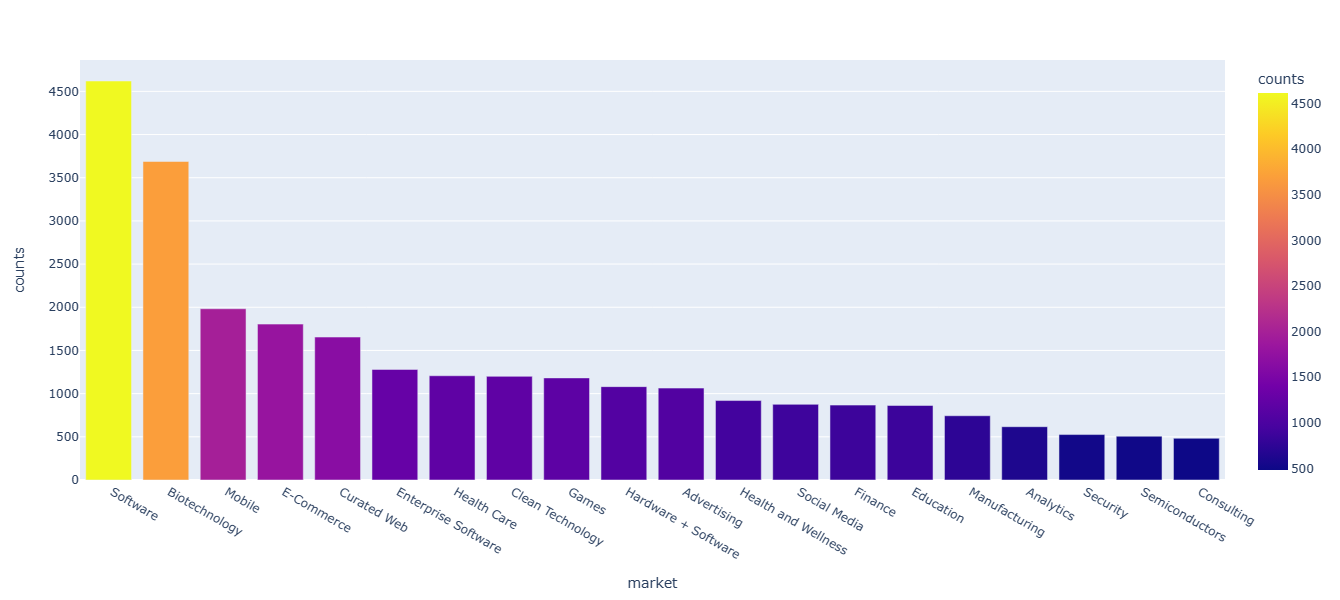

In [38]:
fig = px.bar(top_20_markets_df, x='market', y='counts', color='counts', height=600)
fig.show()

From this graph we can clearly see which markets are the most popular across the world, with **Software** and **Biotechnology** at the forefront.

## Markets receiving the most funding

### Highest funded markets

In [39]:
markets_df = pd.DataFrame(df[['market', 'funding_total_usd']])
markets_df['funding_total_usd'].quantile([0.0, 0.25, 0.5, 0.75, 1], interpolation='nearest')

0.00    0.000000e+00
0.25    5.000000e+04
0.50    1.000000e+06
0.75    6.772388e+06
1.00    3.007950e+10
Name: funding_total_usd, dtype: float64

In [40]:
markets_df['funding_total_usd'].sample(10)

29129     1200000.0
32547           0.0
35963     1900000.0
23507       40000.0
15673    35772451.0
34599       25000.0
42387       40000.0
22920       97000.0
44741     9000000.0
32792       20000.0
Name: funding_total_usd, dtype: float64

Let's get rid of that dash.

In [41]:
markets_df = pd.DataFrame(df[['market', 'funding_total_usd']])

In [42]:
market_data = markets_df.groupby('market')['funding_total_usd'].sum().sort_values(ascending=False)
market_data.head()

market
 Biotechnology        7.337295e+10
 Mobile               4.947011e+10
 Software             4.222348e+10
 Clean Technology     3.761994e+10
 Health Care          2.946608e+10
Name: funding_total_usd, dtype: float64

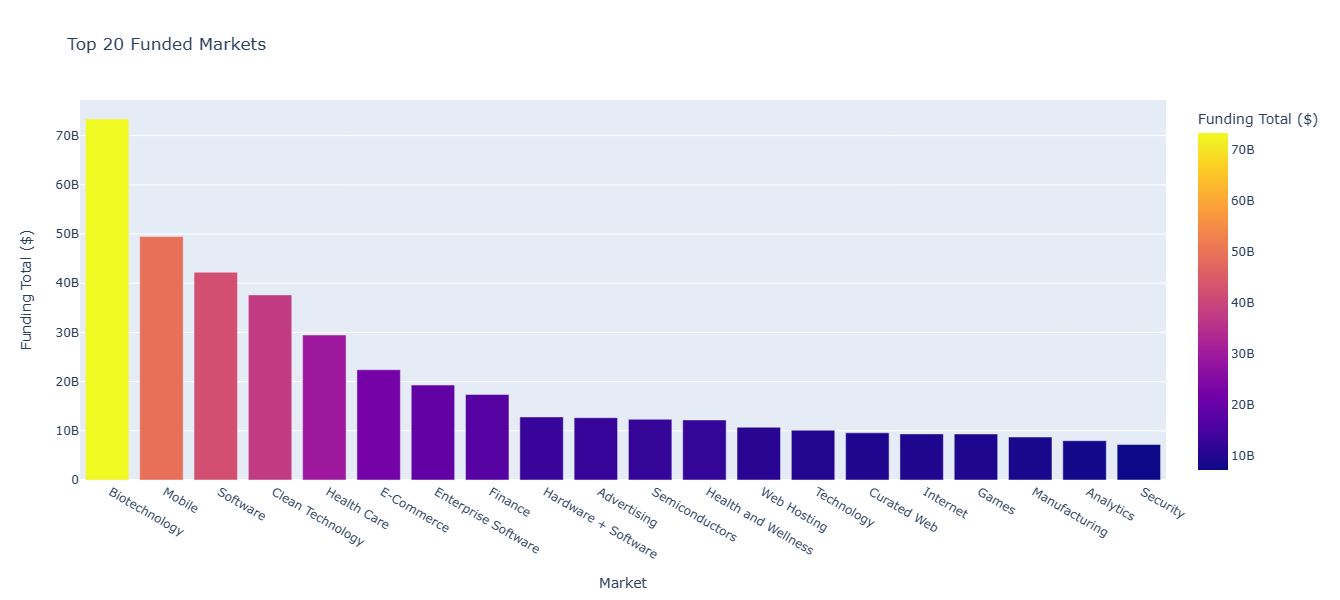

In [43]:
fig2 = px.bar(
    market_data[:20],
    x= market_data[:20].index,
    y='funding_total_usd',
    color='funding_total_usd',
    height=600,
    title="Top 20 Funded Markets",
    labels=dict(funding_total_usd="Funding Total ($)", x="Market"),
)
fig2.update_traces(hovertemplate='%{y:$,.2f}'),
fig2.show()

Here we can see how much funding each of the market sectors has received, with **Biotechnology** leading the pack at $73 billion dollars.

### Highest funded companies

In [44]:
campanies_df = pd.DataFrame(df[['name', 'funding_total_usd']])
company_data = campanies_df.groupby('name')['funding_total_usd'].sum().sort_values(ascending=False)
company_data.head()

name
Verizon Communications    3.007950e+10
Sberbank                  5.800000e+09
Clearwire                 5.700000e+09
Charter Communications    5.162513e+09
First Data Corporation    3.500000e+09
Name: funding_total_usd, dtype: float64

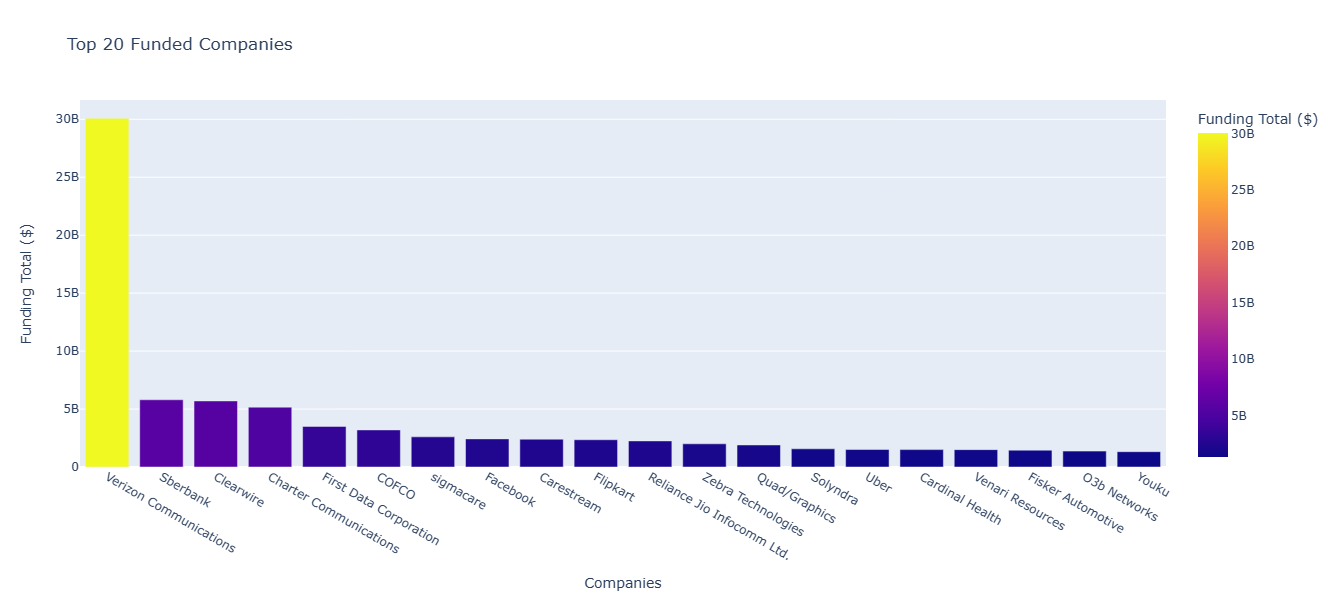

In [45]:
fig3 = px.bar(
    company_data[:20],
    x= company_data[:20].index,
    y='funding_total_usd',
    color='funding_total_usd',
    height=600,
    title="Top 20 Funded Companies",
    labels=dict(funding_total_usd="Funding Total ($)", x="Companies"),
)
fig3.update_traces(hovertemplate='%{y:$,.2f}'),
fig3.show()

Wow, $30 billion dollars is a lot of funding going towards **Verizon Communications**!

## Startup status

In [46]:
status_df = pd.DataFrame(df['status'].value_counts())
status_df

status
operating   41829
acquired     3692
closed       2603
pending      1314

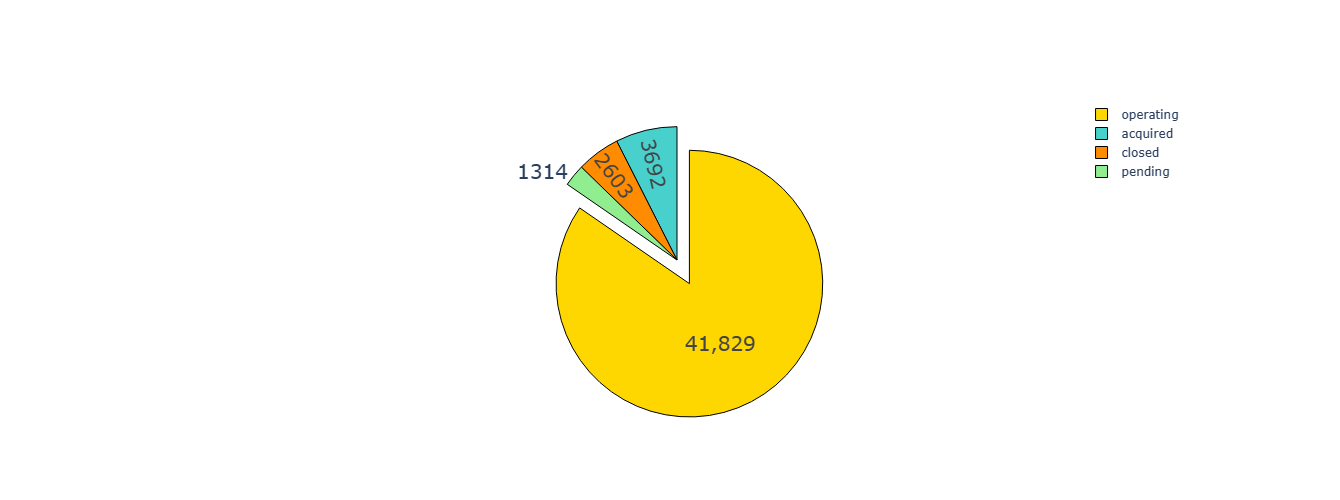

In [47]:
colors = ['gold', 'mediumturquoise', 'darkorange', 'lightgreen']

fig4 = go.Figure(
    data=[
        go.Pie(
            labels=status_df.index,
            values=status_df.status,
            pull=[0.2, 0, 0, 0],
        ),
    ],
)
fig4.update_traces(
    hoverinfo='label+percent',
    textinfo='value',
    textfont_size=20,
    marker=dict(colors=colors, line=dict(color='#000000', width=1)),
)
fig4.update_layout(
    autosize=False,
    width=500,
    height=500,
)
fig4.show()

Looks like the companies that are receiving most of the funding are **operational**.

## Funding stages

How much funding was invested into each stage of funding? In trying to figure out how to display this data, I came across this [Stacked Funnel Plot](https://plotly.com/python/funnel-charts/) over on the plotly website that seemed like the perfect fit.

In [48]:
def generate_dfs():
    dfs = []
    for status in df.status.unique():
        tmp_df = df.query(f'status == "{status}"')
        tmp_df.attrs['name'] = status
        dfs.append(tmp_df)
    return dfs


def create_funnel_chart(data):
    stages = {
        0: 'initial',
        1: 'previous',
        2: 'total',
        3: 'total',
    }
    fig = go.Figure()

    for idx, data_df in enumerate(data):
        fig.add_trace(
            go.Funnel(
                name=data[idx].attrs['name'],
                x=[
                    data[idx].round_A.mean(),
                    data[idx].round_B.mean(),
                    data[idx].round_C.mean(),
                    data[idx].round_D.mean(),
                    data[idx].round_E.mean(),
                    data[idx].round_F.mean(),
                    data[idx].round_G.mean(),
                    data[idx].round_H.mean(),
                ],
                y=["Round A", "Round B","Round C","Round D", "Round E","Round F","Round G","Round H"],
                textinfo=f"percent {stages[idx]}",
            ),
         )
        
    fig.update_layout(
        autosize=False,
        width=800,
        height=600,
    )
    fig.show()

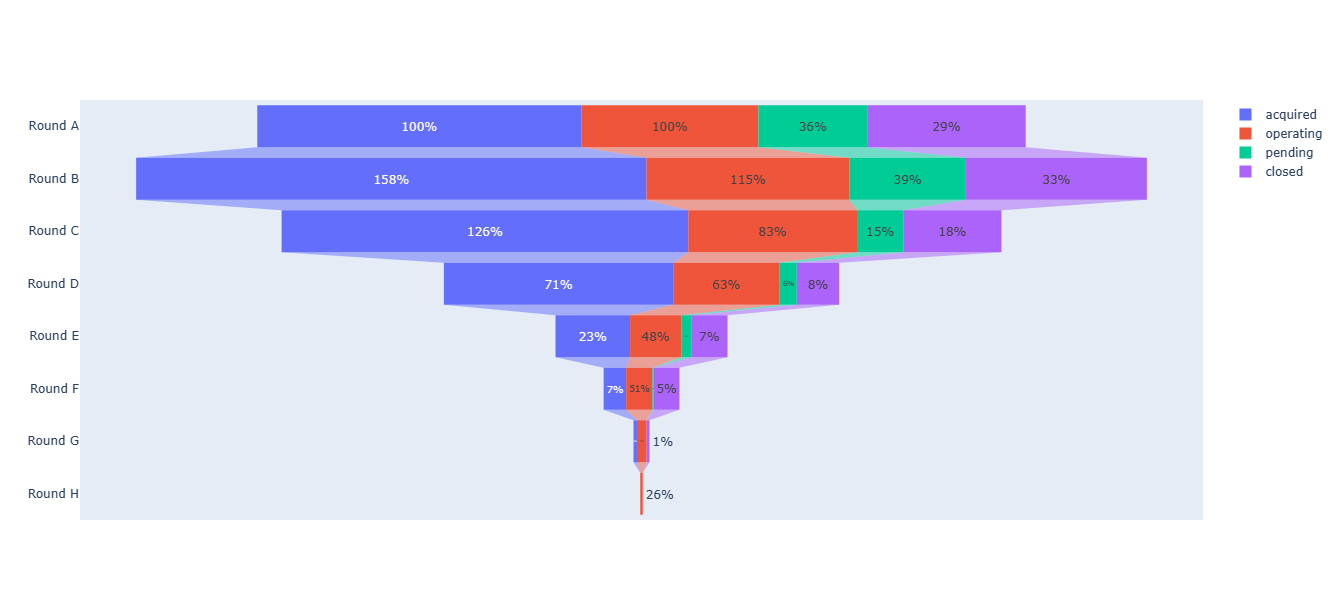

In [49]:
status_data = generate_dfs()
create_funnel_chart(status_data)

**Round_B** clearly funds the most startup companies, followed closely by **Round_A** and **Round_C**.

## Startup investments in the United States by state

In [50]:
@dataclass
class Country:
    country: str
    scope: str
    locationmode:str
    title: str


def plot_map(config: Country):
    country = config.country
    scope = config.scope
    locationmode = config.locationmode
    title = config.title
    
    _df = df.query(f'country_code == "{country}"')['state_code']
    _df = _df.value_counts().to_frame()
    _df.reset_index(inplace=True)
    _df.rename(columns={'index': 'state_code', 'state_code': 'count'}, inplace=True)

    fig = go.Figure(
        data=go.Choropleth(
            locations=_df.state_code,
            z=_df['count'].astype(int),
            locationmode=locationmode,
            colorscale='darkmint',
            colorbar_title="Startup Counts",
        ),
    )
    fig.update_layout(
        title_text=title,
        geo_scope=scope,
        height=500,
    )

    fig.show()
    return _df

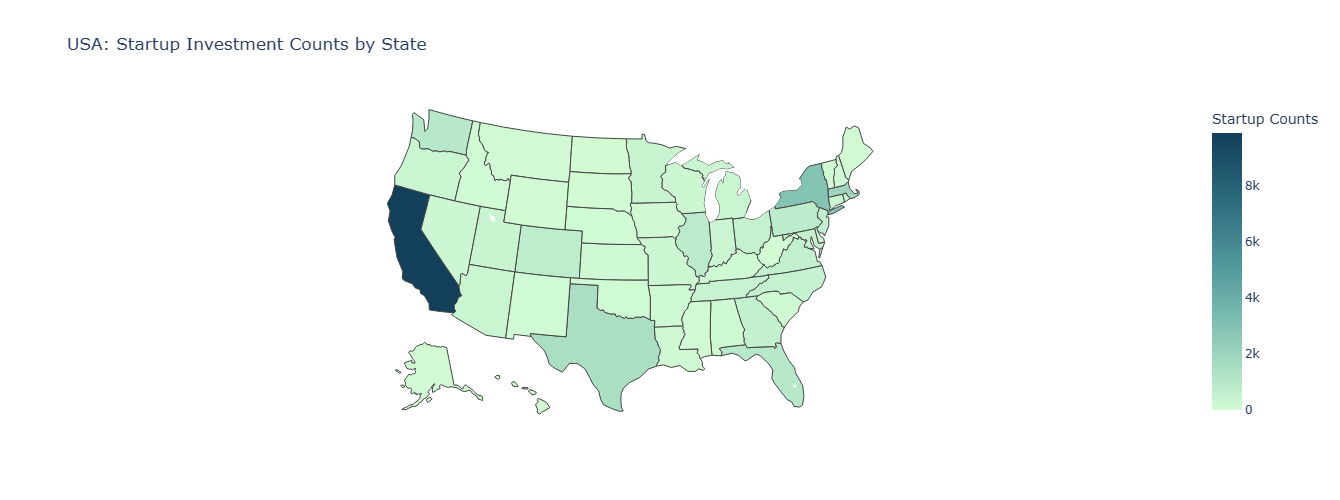

In [51]:
country = 'USA'
scope = country.lower()
locationmode = f'{country}-states'
title = f'{country}: Startup Investment Counts by State'
usa = Country(country, scope, locationmode, title)

usa_df = plot_map(usa)

**California** by far has the most startups at over **9.917k**!

## Funding by status stage

How much funding has gone into each stage for each state?

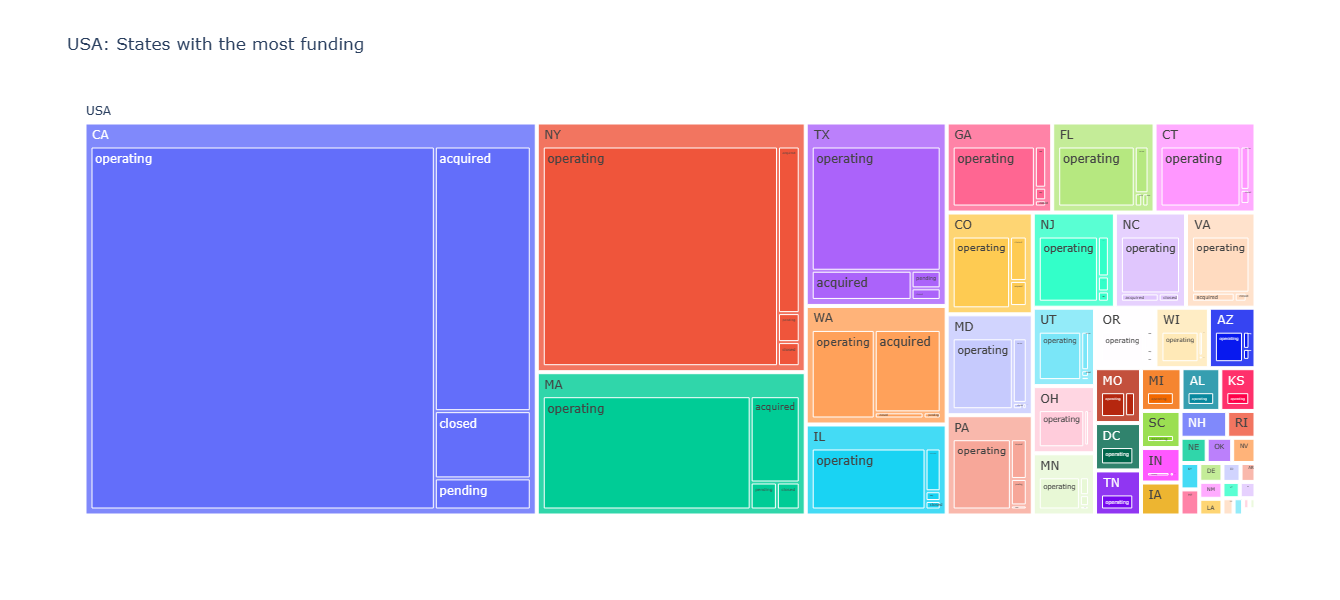

In [52]:
tmp_df = df.query('country_code == "USA"')[['state_code', 'status', 'funding_total_usd']]
state_funding_df = tmp_df.groupby(['state_code', 'status'])['funding_total_usd'].sum().to_frame()
state_funding_df.reset_index(inplace=True)

fig5 = px.treemap(
    state_funding_df,
    path=[px.Constant("USA"), 'state_code', 'status'],
    values='funding_total_usd',
    title='USA: States with the most funding',
    height=600,
)
fig5.update_traces(
    hovertemplate='<b>%{label}</b> <br> Funding: %{value:$,.2f}'),
fig5.show()

Interesting insight here is that **Washington's** *operating* startups are almost the same as its *aquired* ones.

## Funding rounds

Let's take a look at how many rounds of funding each of the stages received.

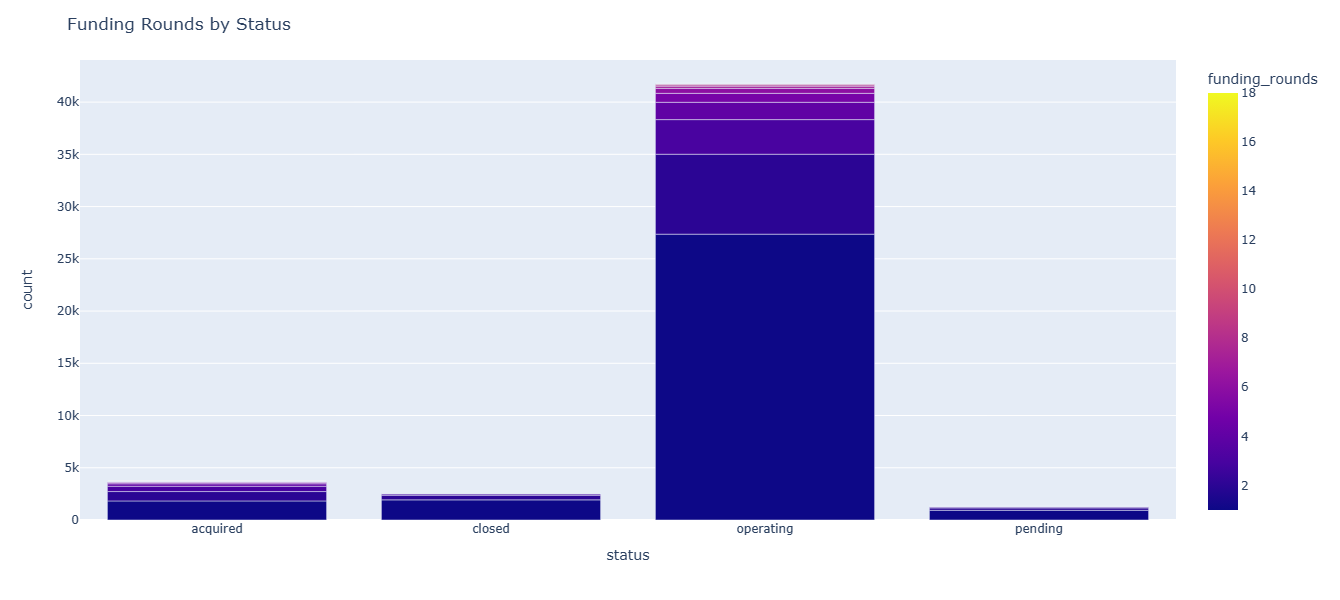

In [53]:
funding_rounds_df = df.groupby(['status', 'funding_rounds'])['name'].count().to_frame()
funding_rounds_df.rename(columns={'name': 'count'}, inplace=True)
funding_rounds_df.reset_index(inplace=True)

fig6 = px.bar(
    funding_rounds_df,
    x='status',
    y='count',
    color='funding_rounds',
    hover_data=['funding_rounds'],
    barmode='stack',
)
fig6.update_layout(height=600, width=800, title='Funding Rounds by Status')

fig6.show()

It's obvious now that the startups that are still operational are the ones that receive the most rounds of funding.

## What year where the most startups founded on

The data goes back pretty far and no significant changes are visible until the late 90's, so I've filtered out the older stuff.

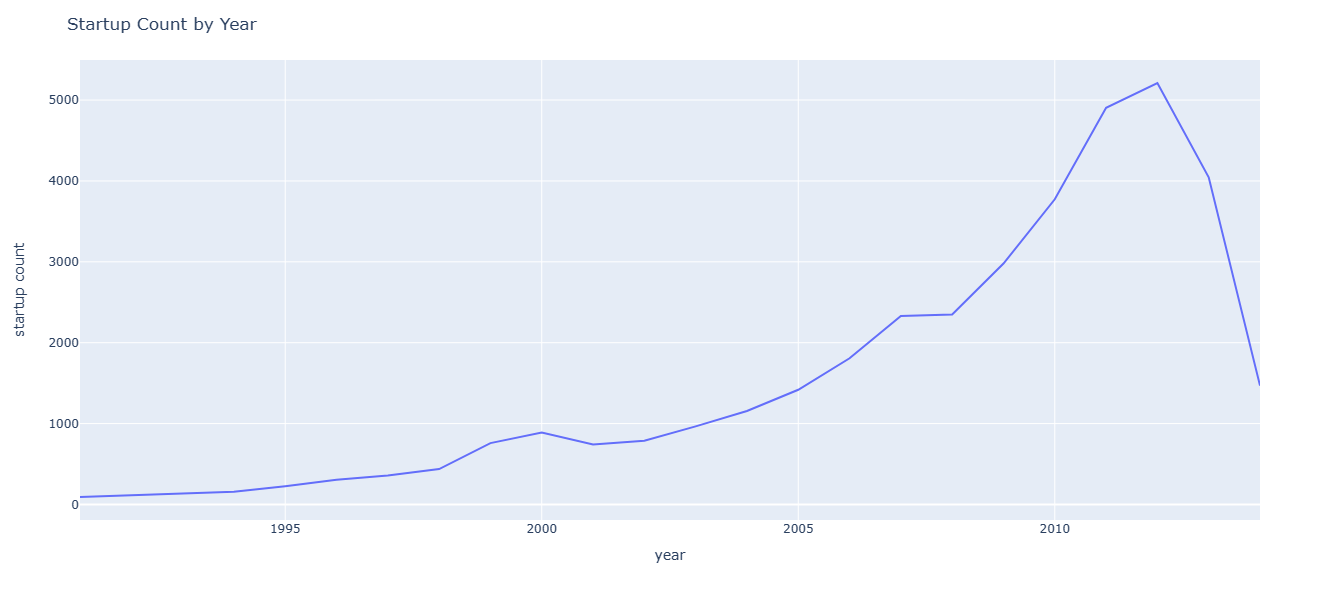

In [54]:
newer_df = df[df['founded_at'].dt.year > datetime.date(1990, 1, 1).year]
newer_df['founded_year'] = newer_df['founded_at'].dt.year
founded_counts = newer_df.groupby('founded_year')['name'].count().to_frame().reset_index()
# founded_counts.plot(x='year')
fig7 = px.line(founded_counts, x='founded_year', y='name')
fig7.update_traces(hovertemplate=None)
fig7.update_layout(
    xaxis_title='year',
    yaxis_title='startup count',
    height=600,
    width=600,
    title='Startup Count by Year',
    hovermode="x",
)
fig7.show()

The year **2012** was the year for startups, with **5,211**! It's been declining ever since.

### Startup Count by Quarter

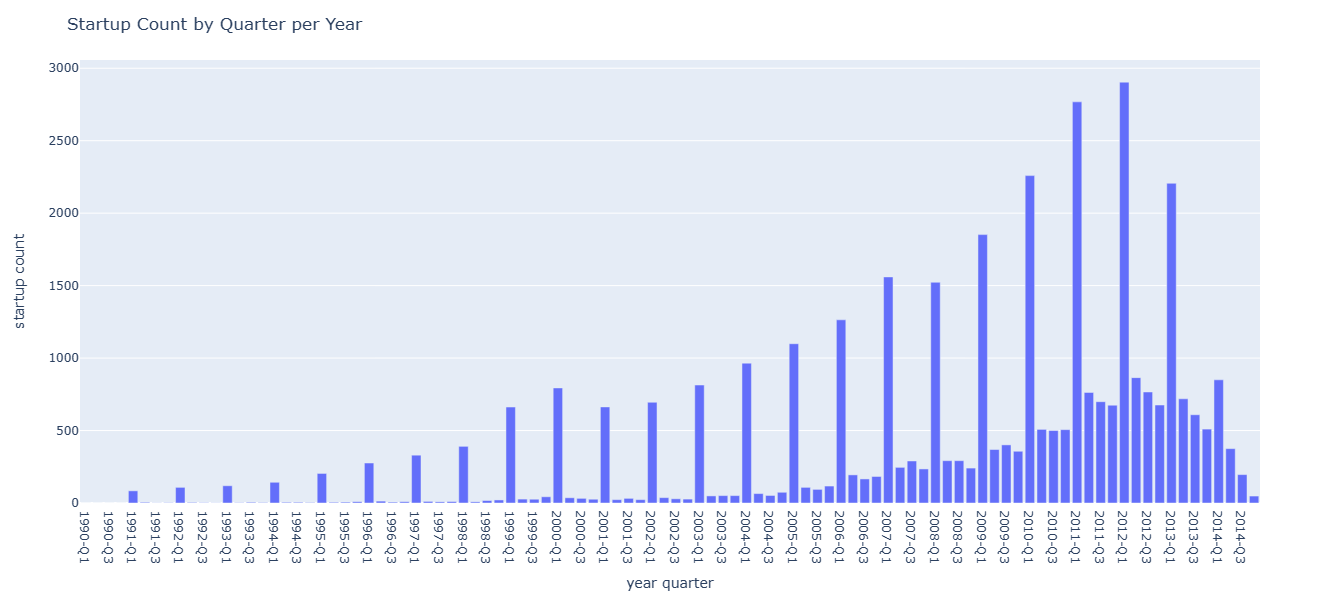

In [55]:
founded_qcounts = newer_df.groupby('founded_quarter')['name'].count().to_frame().reset_index()
founded_qcounts = founded_qcounts[founded_qcounts['founded_quarter'].apply(lambda x: True if int(x.split('-')[0]) >= 1990 else False )]
fig8 = px.bar(founded_qcounts, x='founded_quarter', y='name')
fig8.update_traces(hovertemplate=None)
fig8.update_layout(
    xaxis_title='year quarter',
    yaxis_title='startup count',
    height=600,
    width=800,
    title='Startup Count by Quarter per Year',
    hovermode="x",
)
fig8.show()

It's pretty interesting to see that the most startups are founded on the first quarter of each year.

## Startups that got funding within the first year

In [56]:
newer_df['time_lapse'] = newer_df['first_funding_at'] - newer_df['founded_at']
newer_df['time_lapse'] = newer_df['time_lapse'].dt.days

In [57]:
under_one_df = newer_df[(newer_df['time_lapse'] > 0) & (newer_df['time_lapse'] < 365) & (newer_df['funding_total_usd'] > 0)]
under_one_df['time_lapse'] = under_one_df['time_lapse'].apply(lambda x: x if x >= 0 else 0)
under_one_df = under_one_df[['name', 'market', 'funding_total_usd', 'status', 'country_code', 'time_lapse']]
under_one_df.dropna(subset=['market', 'country_code'], inplace=True)
under_one_df.sort_values(by=['time_lapse', 'funding_total_usd'], ascending=[True, False], inplace=True)
under_one_df.reset_index(drop=True, inplace=True)
under_one_df.head()

name                 market  funding_total_usd     status  \
0    Ozura World         Mobile Social          53000000.0  operating   
1      Openbravo   Enterprise Software          18034000.0  operating   
2         Washio    Service Industries          16820000.0  operating   
3      FieldLens          Construction          12635000.0  operating   
4  I-CAN Systems   Enterprise Software           9670000.0  operating   

  country_code  time_lapse  
0          HKG         1.0  
1          ESP         1.0  
2          USA         1.0  
3          USA         1.0  
4          ARE         1.0

Here's the top 20 companies that received the most funding within the first year.

In [58]:
under_one_df[under_one_df['country_code'] == 'USA'].head(20)

name                 market  funding_total_usd  \
2                      Washio    Service Industries          16820000.0   
3                   FieldLens          Construction          12635000.0   
6                    The Dodo                  News           6678569.0   
7                        Cozi              Shopping           5800000.0   
9            CrowdEngineering   Enterprise Software           4350000.0   
11                CatchSquare                Sports           2000000.0   
12  Dynamic Defense Materials        Transportation           2000000.0   
13                     Addapp              Software           1800000.0   
14                  Sharalike         Photo Sharing           1584187.0   
15                      Kixer           Advertising           1000000.0   
17                     Heysan             Messaging            875000.0   
18         Saint Cloud Arcade                 Games            600000.0   
20               Toppic, Inc.          Mobile Games            370000.0   
21                      Bizen              Software            365000.0   
22                    Kuratur    Blogging Platforms            342000.0   
25                   Educents             Education            120000.0   
29                      Tunii                 Music            100000.0   
33                TranquilMed         Biotechnology             27000.0   
34          Social Collective              Contests             20000.0   
35              CloudAptitude            Technology             15000.0   

       status country_code  time_lapse  
2   operating          USA         1.0  
3   operating          USA         1.0  
6   operating          USA         1.0  
7    acquired          USA         1.0  
9   operating          USA         1.0  
11  operating          USA         1.0  
12  operating          USA         1.0  
13  operating          USA         1.0  
14  operating          USA         1.0  
15  operating          USA         1.0  
17   acquired          USA         1.0  
18  operating          USA         1.0  
20  operating          USA         1.0  
21  operating          USA         1.0  
22  operating          USA         1.0  
25  operating          USA         1.0  
29  operating          USA         1.0  
33     closed          USA         1.0  
34     closed          USA         1.0  
35  operating          USA         1.0

> **NOTE**: Interesting that all of these are in the USA.

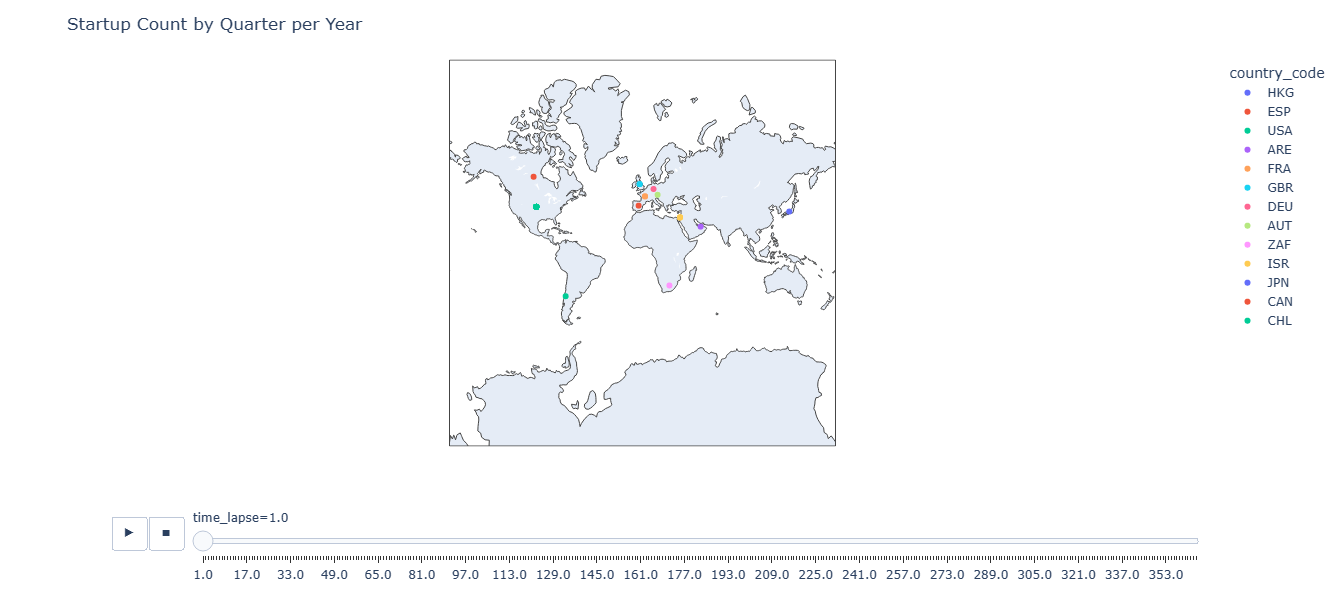

In [59]:
fig9 = px.scatter_geo(
    under_one_df,
    locations='country_code',
    color='country_code',
    hover_name='country_code',
    # size='funding_total_usd',
    animation_frame='time_lapse',
    projection='mercator',
    # projection='natural earth2',
    # projection='orthographic',
    hover_data={
        'country_code': False,
        'funding_total_usd': ':$,.0f',
        'time_lapse': ':,0f',
    },
)
fig9.update_layout(
    height=600,
    width=800,
    title='Startup Count by Quarter per Year',
)
fig9.show()

In [60]:
df.isnull().sum()

permalink                   0
name                        0
homepage_url             3449
category_list            3961
market                   3968
funding_total_usd           0
status                      0
country_code             5273
state_code              19277
region                   5273
city                     6116
funding_rounds              0
founded_at              10885
founded_month           10956
founded_quarter         10956
founded_year            10956
first_funding_at           10
last_funding_at             6
seed                        0
venture                     0
equity_crowdfunding         0
undisclosed                 0
convertible_note            0
debt_financing              0
angel                       0
grant                       0
private_equity              0
post_ipo_equity             0
post_ipo_debt               0
secondary_market            0
product_crowdfunding        0
round_A                     0
round_B                     0
round_C   

In [61]:
nonull_df = df.drop(['homepage_url', 'category_list', 'market', 'country_code', 'state_code', 'region', 'city', 'founded_at', 'founded_month', 'founded_quarter', 'founded_year'], axis=1)
nonull_df.isnull().sum()

permalink                0
name                     0
funding_total_usd        0
status                   0
funding_rounds           0
first_funding_at        10
last_funding_at          6
seed                     0
venture                  0
equity_crowdfunding      0
undisclosed              0
convertible_note         0
debt_financing           0
angel                    0
grant                    0
private_equity           0
post_ipo_equity          0
post_ipo_debt            0
secondary_market         0
product_crowdfunding     0
round_A                  0
round_B                  0
round_C                  0
round_D                  0
round_E                  0
round_F                  0
round_G                  0
round_H                  0
dtype: int64

In [62]:
nonull_df = nonull_df[nonull_df['first_funding_at'].notna()]
nonull_df = nonull_df[nonull_df['last_funding_at'].notna()]
nonull_df.isnull().sum()

permalink               0
name                    0
funding_total_usd       0
status                  0
funding_rounds          0
first_funding_at        0
last_funding_at         0
seed                    0
venture                 0
equity_crowdfunding     0
undisclosed             0
convertible_note        0
debt_financing          0
angel                   0
grant                   0
private_equity          0
post_ipo_equity         0
post_ipo_debt           0
secondary_market        0
product_crowdfunding    0
round_A                 0
round_B                 0
round_C                 0
round_D                 0
round_E                 0
round_F                 0
round_G                 0
round_H                 0
dtype: int64

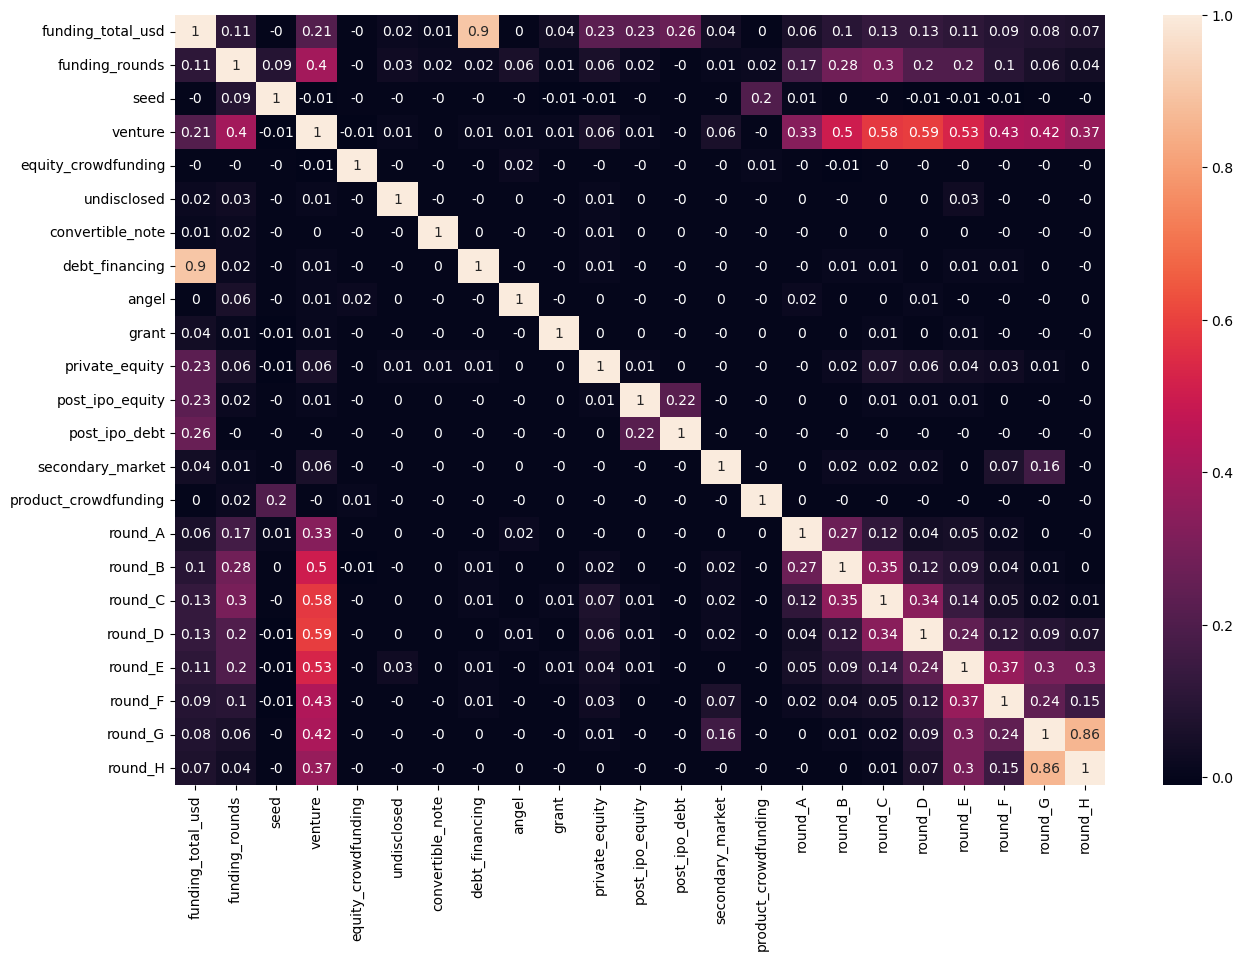

In [63]:
fig, ax = plt.subplots(figsize=(15, 10))
matrix = nonull_df.corr().round(2)
sns.heatmap(matrix, annot=True)
plt.show()

In [64]:
numeric = [feature for feature in nonull_df.columns if nonull_df[feature].dtype == 'float']
categorical = [feature for feature in nonull_df.columns if nonull_df[feature].dtype != 'float']

<AxesSubplot: xlabel='status', ylabel='Count'>

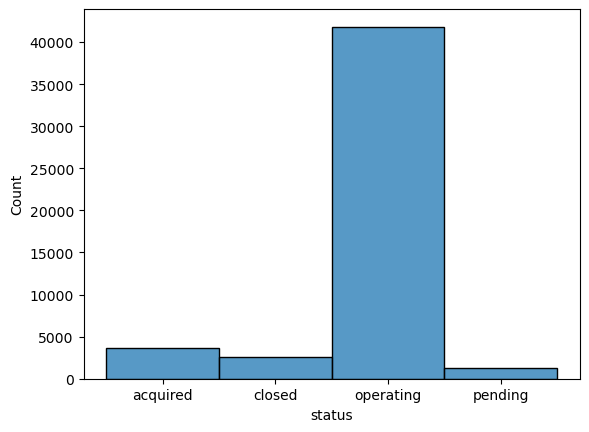

In [65]:
sns.histplot(nonull_df, x='status')

In [66]:
nonull_df.groupby('status')['status'].count()

status
acquired      3691
closed        2603
operating    41820
pending       1314
Name: status, dtype: int64

## Score Keeper

In [67]:
columns = ['classifier', 'accuracy', 'precision', 'recall', 'f1-score']
clf_scores = pd.DataFrame(columns=columns)


def score_keeper(clf, y_true, y_pred):
    global clf_scores
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='macro')
    recall = recall_score(y_true, y_pred, average='macro')
    f1 = f1_score(y_true, y_pred, average='macro')
    scores = {
        'classifier': clf,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1-score': f1,
    }
    clf_scores = clf_scores.append(scores, ignore_index=True)

## Use SMOTE to handle the imbalance

In [68]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# X is the feature matrix and y is the target vector
y = nonull_df['status'].values
X = nonull_df.drop(['status'], axis=1)
X = X[numeric]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to the training data
sm = SMOTE(random_state=42)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)

In [69]:
np.unique(y_train, return_counts=True)

(array(['acquired', 'closed', 'operating', 'pending'], dtype=object),
 array([ 2938,  2068, 33474,  1062]))

In [70]:
np.unique(y_test, return_counts=True)

(array(['acquired', 'closed', 'operating', 'pending'], dtype=object),
 array([ 753,  535, 8346,  252]))

## One Hot Encode the target values

In [71]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Initialize the LabelEncoder
le = LabelEncoder()

# Fit the LabelEncoder to the target labels
le.fit(y_train)

# Transform the target labels to numerical values
y_train_smote_enc = le.transform(y_train_smote)
y_train_enc = le.transform(y_train)
y_test_enc = le.transform(y_test)

# Initialize the OneHotEncoder
ohe = OneHotEncoder()

# Fit the OneHotEncoder to the numerical labels
ohe.fit(y_train_enc.reshape(-1, 1))

# Transform the numerical labels to one-hot encoded labels
y_train_smote_ohe = ohe.transform(y_train_smote_enc.reshape(-1, 1)).toarray()
y_train_ohe = ohe.transform(y_train_enc.reshape(-1, 1)).toarray()
y_test_ohe = ohe.transform(y_test_enc.reshape(-1, 1)).toarray()

## kNN

In [72]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.utils import parallel_backend
from sklearn.model_selection import GridSearchCV

# knn = KNeighborsClassifier()
# param_grid = {'n_neighbors': [1, 2, 3, 4, 5], 'weights': ['uniform', 'distance']}

# with parallel_backend('threading'):
#     grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', return_train_score=True)
#     grid_search.fit(X_train_smote, y_train_smote_enc)

# print("Best parameters: ", grid_search.best_params_)
# print("Best accuracy: ", grid_search.best_score_)

print("Best parameters:  {'n_neighbors': 4, 'weights': 'distance'}")
print("Best accuracy:  0.5414278022240573")

Best parameters:  {'n_neighbors': 4, 'weights': 'distance'}
Best accuracy:  0.5414278022240573


In [73]:
knn = KNeighborsClassifier(n_neighbors=4, weights='distance')
knn.fit(X_train_smote, y_train_smote_enc)

KNeighborsClassifier(n_neighbors=4, weights='distance')

In [74]:
y_pred = knn.predict(X_test)
score_keeper('KNeighborsClassifier', y_test_enc, y_pred)
clf_scores[clf_scores.classifier == 'KNeighborsClassifier']

classifier  accuracy  precision    recall  f1-score
0  KNeighborsClassifier  0.636253   0.277959  0.303676  0.278633

## Random Forest

**NOTE:** I read somewhere that **Random Forest** and **XGBoost** can handle imbalaced datasets, internally automatically, so I switched to using the un-smoted datasets.

In [75]:
from sklearn.datasets import make_multilabel_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# # Initialize the Random Forest classifier
# rf_clf = RandomForestClassifier()

# # Fit the classifier to the training data
# rf_clf.fit(X_train, y_train_enc)

# # Predict the labels of the test set
# y_pred = rf_clf.predict(X_test)

# # Calculate the accuracy
# accuracy = accuracy_score(y_test_enc, y_pred)
# print("Accuracy: ", accuracy)

print("Accuracy:  0.817722031155169")


# # with smote
# rf_clf = RandomForestClassifier()
# rf_clf.fit(X_train_smote, y_train_smote_enc)
# y_pred = rf_clf.predict(X_test)
# accuracy = accuracy_score(y_test_enc, y_pred)
# print("Accuracy: ", accuracy)

# print("Accuracy:  0.606918875177018")

Accuracy:  0.817722031155169


In [76]:
# from sklearn.model_selection import GridSearchCV

# param_grid = {'n_estimators': [10, 50, 100],
#               'max_depth': [None, 5, 10],
#               'min_samples_split': [2, 5],
#               'min_samples_leaf': [1, 2]}
# with parallel_backend('threading'):
#     grid_search = GridSearchCV(rf_clf, param_grid, cv=5, scoring='accuracy', return_train_score=True)
#     grid_search.fit(X_train, y_train_enc)

# print("Best parameters: ", grid_search.best_params_)
# print("Best accuracy: ", grid_search.best_score_)

print("Best parameters:  {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}")
print("Best accuracy:  0.8466187908961658")

# # using smote
# param_grid = {'n_estimators': [10, 50, 100],
#               'max_depth': [None, 5, 10],
#               'min_samples_split': [2, 5],
#               'min_samples_leaf': [1, 2]}
# with parallel_backend('threading'):
#     grid_search = GridSearchCV(rf_clf, param_grid, cv=5, scoring='accuracy', return_train_score=True)
#     grid_search.fit(X_train_smote, y_train_smote_enc)

# print("Best parameters: ", grid_search.best_params_)
# print("Best accuracy: ", grid_search.best_score_)

# print("Best parameters:  {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}")
# print("Best accuracy:  0.6486230923258922")

Best parameters:  {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best accuracy:  0.8466187908961658


In [77]:
rf_clf = RandomForestClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=50)
rf_clf.fit(X_train, y_train_enc)

RandomForestClassifier(max_depth=10, min_samples_leaf=2, n_estimators=50)

In [78]:
y_pred = rf_clf.predict(X_test)
score_keeper('RandomForestClassifier', y_test_enc, y_pred)
clf_scores[clf_scores.classifier == 'RandomForestClassifier']

classifier  accuracy  precision   recall  f1-score
1  RandomForestClassifier  0.844022   0.211048  0.24994  0.228854

## XGBoost

In [79]:
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.multiclass import OneVsRestClassifier

# Create an instance of the XGBClassifier
xgb_clf = xgb.XGBClassifier(objective='multi:softmax', num_class=len(nonull_df.status.unique()))

In [80]:
# param_grid = {
#     'nthread':[4],
#     'objective':['binary:logistic'],
#     'learning_rate': [0.05],
#     'max_depth': [3, 4, 5, 6],
#     'min_child_weight': [11],
#     'silent': [1],
#     'subsample': [0.8],
#     'colsample_bytree': [0.7],
#     'n_estimators': [5, 100, 200, 300, 500], #number of trees, change it to 1000 for better results
#     'missing':[-999],
#     'seed': [42],
# }

# with parallel_backend('threading'):
#     GridSearchCV(
#         xgb_clf,
#         param_grid,
#         n_jobs=5, 
#         cv=StratifiedKFold(
#             shuffle=True,
#             random_state=42,
#         ),
#         scoring='roc_auc',
#         verbose=2,
#         refit=True,
#     )
#     grid_search.fit(X_train, y_train_enc)

# print("Best parameters: ", grid_search.best_params_)
# print("Best accuracy: ", grid_search.best_score_)

print("Best parameters:  {'max_depth': 3, 'n_estimators': 100}")
print("Best accuracy:  0.8462647382565454")

# # with smote
# param_grid = {
#     'nthread':[4],
#     'objective':['binary:logistic'],
#     'learning_rate': [0.05],
#     'max_depth': [3, 4, 5, 6],
#     'min_child_weight': [11],
#     'silent': [1],
#     'subsample': [0.8],
#     'colsample_bytree': [0.7],
#     'n_estimators': [5, 100, 200, 300, 500], #number of trees, change it to 1000 for better results
#     'missing':[-999],
#     'seed': [42],
# }

# with parallel_backend('threading'):
#     GridSearchCV(
#         xgb_clf,
#         param_grid,
#         n_jobs=5, 
#         cv=StratifiedKFold(
#             shuffle=True,
#             random_state=42,
#         ),
#         scoring='roc_auc',
#         verbose=2,
#         refit=True,
#     )
#     grid_search.fit(X_train_smote, y_train_smote_enc)

# print("Best parameters: ", grid_search.best_params_)
# print("Best accuracy: ", grid_search.best_score_)

# print("Best parameters:  {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}")
# print("Best accuracy:  0.6478239759672574")

Best parameters:  {'max_depth': 3, 'n_estimators': 100}
Best accuracy:  0.8462647382565454


In [81]:
xgb_clf = xgb.XGBClassifier(
    objective='multi:softmax',
    num_class=len(nonull_df.status.unique()),
    max_depth=3,
    n_estimators=100,
    n_jobs=-1,
)
xgb_clf.fit(X_train, y_train_enc)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=3, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=-1, num_class=4, num_parallel_tree=1,
              objective='multi:softmax', ...)

In [82]:
# test_probs = xgb_clf.predict_proba(X_test)[:,1]
y_pred = xgb_clf.predict(X_test)
score_keeper('XGBoost', y_test_enc, y_pred)
clf_scores[clf_scores.classifier == 'XGBoost']

classifier  accuracy  precision   recall  f1-score
2    XGBoost   0.84382    0.21104  0.24988  0.228824

In [83]:
# Use OneVsRestClassifier to handle multi-label classification
ovr_clf = OneVsRestClassifier(xgb_clf)

# Fit the classifier to the training data
ovr_clf.fit(X_train, y_train_enc)

# Make predictions on the test set
y_pred = ovr_clf.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test_enc, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 84.38%


In [84]:
y_pred = ovr_clf.predict(X_test)
score_keeper('XGBoost-OnevsRest', y_test_enc, y_pred)
clf_scores[clf_scores.classifier == 'XGBoost-OnevsRest']

classifier  accuracy  precision    recall  f1-score
3  XGBoost-OnevsRest   0.84382   0.252724  0.250182   0.22948

## Compare the different models

In [85]:
clf_scores

classifier  accuracy  precision    recall  f1-score
0    KNeighborsClassifier  0.636253   0.277959  0.303676  0.278633
1  RandomForestClassifier  0.844022   0.211048  0.249940  0.228854
2                 XGBoost  0.843820   0.211040  0.249880  0.228824
3       XGBoost-OnevsRest  0.843820   0.252724  0.250182  0.229480